
# STUDY 2 - Examining Gender Bias in Word Embeddings

In [4]:
import gensim
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec

RuntimeError: Cython extensions are unavailable. Without them, this gensim functionality is disabled. If you've installed from a package, ask the package maintainer to include Cython extensions. If you're building gensim from source yourself, run `python setup.py build_ext --inplace` and retry. 

In [ ]:
import gensim
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec

In [15]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
model.init_sims(replace=True) # The vectors shall be normalized by L2 norm to reproduce the results published

c:\users\naira\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
def check_full_list(counterpart, obj, subj):

    top_ten = model.most_similar(positive=[counterpart, obj], negative=[subj])
    vec1 = (model.get_vector(counterpart) + model.get_vector(obj) - model.get_vector(subj)).reshape(1, 300)
    vec2 = model.get_vector(obj).reshape(1, 300)
    top_ten.append((obj, cosine_similarity(vec1, vec2)[0][0]))
    return sorted(top_ten, key=lambda x: x[1], reverse=True)

## Word Embedding Representation 

In [18]:
check_full_list(counterpart='Tokyo', obj='France', subj='Paris')

[('Japan', 0.8167769908905029),
 ('Japanese', 0.6480901837348938),
 ('South_Korea', 0.6141558885574341),
 ('Japans', 0.6117385029792786),
 ('Shizuoka', 0.5742497444152832),
 ('Aomori_Prefecture', 0.5598059296607971),
 ('northernmost_prefecture', 0.552474856376648),
 ('Kyushu', 0.5514252781867981),
 ('captain_Makoto_Hasebe', 0.5508173704147339),
 ('Shimane', 0.5497494339942932),
 ('France', 0.5303857)]

### he - king = she - ?

In [19]:
check_full_list( counterpart='she', obj='king', subj='he')

[('queen', 0.7633836269378662),
 ('king', 0.6967242),
 ('princess', 0.6342117786407471),
 ('queens', 0.5744964480400085),
 ('monarch', 0.5577755570411682),
 ('goddess', 0.5278830528259277),
 ('princesses', 0.5202734470367432),
 ('Queen_Consort', 0.5134547352790833),
 ('very_pampered_McElhatton', 0.5131746530532837),
 ('empress', 0.5119601488113403),
 ('queendom', 0.5091063976287842)]

### Examples of gender stereotypes

### she - sewing = he - ? 

In [21]:
check_full_list(subj='she', obj='sewing', counterpart='he')

[('sewing', 0.66992193),
 ('woodworking', 0.5794616937637329),
 ('sew', 0.531487226486206),
 ('carpentry', 0.5230335593223572),
 ('woodcarving', 0.49166661500930786),
 ('wood_carving', 0.47534996271133423),
 ('leatherworking', 0.4700630009174347),
 ('Sewing', 0.4634256958961487),
 ('knitting', 0.46304479241371155),
 ('spinning_weaving', 0.4606916308403015),
 ('woodworking_shop', 0.45343703031539917)]

### he- sewing = she - ? 

In [22]:
check_full_list(subj='he', obj='sewing', counterpart='she')

[('sewing', 0.8244272),
 ('knitting', 0.6727133393287659),
 ('quilting', 0.6575378775596619),
 ('Sewing', 0.6378443241119385),
 ('needlework', 0.6374493837356567),
 ('sewing_embroidery', 0.5977171659469604),
 ('crochet', 0.5976918339729309),
 ('crocheting', 0.5905722379684448),
 ('serger', 0.5881949067115784),
 ('needlecraft', 0.5823681354522705),
 ('sewing_quilting', 0.5818668603897095)]

### The occupations differ from male and female. While labour intensive occupations like carpentry and woodworking are associated with men, knitting and crocheting is associated with women. Hencethe results strengthen existing notions of gender stereotypes present in the society


### she - nurse = he - ?

In [23]:
check_full_list(subj='she', obj='nurse', counterpart='he')

[('nurse', 0.6655272),
 ('doctor', 0.5559605360031128),
 ('medic', 0.5425376892089844),
 ('physician', 0.5394271016120911),
 ('x_ray_technician', 0.5355569124221802),
 ('surgeon', 0.5160146951675415),
 ('nurses', 0.49741458892822266),
 ('paramedic', 0.4924110770225525),
 ('anesthetist', 0.48865455389022827),
 ('patient', 0.46544164419174194),
 ('doctors', 0.46398618817329407)]

### he - nurse = she - ?

In [25]:
check_full_list(subj='he', obj='nurse', counterpart='she')

[('nurse', 0.82805425),
 ('registered_nurse', 0.7027999758720398),
 ('nurse_practitioner', 0.6314353942871094),
 ('midwife', 0.620543360710144),
 ('nurses', 0.6066274046897888),
 ('certified_lactation_counselor', 0.5820688009262085),
 ('nurse_midwife', 0.5799016952514648),
 ('birth_doula', 0.5744963884353638),
 ('neonatal_nurse', 0.5663832426071167),
 ('dental_hygienist', 0.5519738793373108),
 ('lactation_consultant', 0.5466617941856384)]

### he - surgeon = she - ?

In [26]:
check_full_list(subj='he', obj='surgeon', counterpart='she')

[('surgeon', 0.7236081),
 ('gynecologist', 0.6337346434593201),
 ('surgeons', 0.6173180937767029),
 ('plastic_surgeon', 0.5985188484191895),
 ('nurse', 0.5903362035751343),
 ('cosmetic_surgeon', 0.5817877054214478),
 ('hysterectomy', 0.5799471139907837),
 ('obstetrician', 0.5660049915313721),
 ('sonographer', 0.5639317035675049),
 ('midwife', 0.5569907426834106),
 ('MRI_technologist', 0.5460633635520935)]

### she - lovely = he - ?

In [30]:
check_full_list(subj='she', obj='lovely', counterpart='he')

[('lovely', 0.69995606),
 ('magnificent', 0.624822735786438),
 ('marvelous', 0.6054928302764893),
 ('splendid', 0.5995590686798096),
 ('nice', 0.5869458913803101),
 ('fantastic', 0.5587064027786255),
 ('delightful', 0.5561119914054871),
 ('terrific', 0.5524159669876099),
 ('wonderful', 0.5481390953063965),
 ('brilliant', 0.5460424423217773),
 ('beautiful', 0.5450632572174072)]

### she - lovely = she - ?

In [31]:
check_full_list(subj='she', obj='lovely', counterpart='she')

[('lovely', 1.0),
 ('beautiful', 0.810693621635437),
 ('gorgeous', 0.8014094829559326),
 ('delightful', 0.7586832642555237),
 ('wonderful', 0.7320095896720886),
 ('fabulous', 0.712957501411438),
 ('marvelous', 0.6729509234428406),
 ('nice', 0.6676311492919922),
 ('charming', 0.6509543657302856),
 ('magnificent', 0.6507099866867065),
 ('splendid', 0.6399756669998169)]

In [37]:
model.most_similar(positive=['he', 'homemaker'], negative=['she'])

[('carpenter', 0.5112387537956238),
 ('tinkerer', 0.47657936811447144),
 ('machinist', 0.47604191303253174),
 ('mechanical_engineer', 0.4732445478439331),
 ('lifelong_resident', 0.4710805118083954),
 ('avid_fisherman', 0.4508780837059021),
 ('laborer', 0.4494982063770294),
 ('retired', 0.4469570517539978),
 ('businessman', 0.4450863003730774),
 ('retired_schoolteacher', 0.4420374631881714)]

In [38]:
print(model.similarity('he', 'nurse'))
print(model.similarity('she', 'nurse'))

0.122331396
0.3694259


In [39]:
nurse_list = model.most_similar(positive=['he', 'nurse'], negative=['she'])
nurse_list

[('doctor', 0.5559605360031128),
 ('medic', 0.5425376892089844),
 ('physician', 0.5394271016120911),
 ('x_ray_technician', 0.5355569124221802),
 ('surgeon', 0.5160146951675415),
 ('nurses', 0.49741458892822266),
 ('paramedic', 0.4924110770225525),
 ('anesthetist', 0.48865455389022827),
 ('patient', 0.46544164419174194),
 ('doctors', 0.46398618817329407)]

In [27]:
help(model)

Help on Word2VecKeyedVectors in module gensim.models.keyedvectors object:

class Word2VecKeyedVectors(WordEmbeddingsKeyedVectors)
 |  Class to contain vectors and vocab for word2vec model.
 |  Used to perform operations on the vectors such as vector lookup, distance, similarity etc.
 |  
 |  Method resolution order:
 |      Word2VecKeyedVectors
 |      WordEmbeddingsKeyedVectors
 |      BaseKeyedVectors
 |      gensim.utils.SaveLoad
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  get_keras_embedding(self, train_embeddings=False)
 |      Return a Keras 'Embedding' layer with weights set as the Word2Vec model's learned word embeddings
 |      
 |      Parameters
 |      ----------
 |      train_embeddings : bool
 |          If False, the weights are frozen and stopped from being updated.
 |          If True, the weights can/will be further trained/updated.
 |      
 |      Returns
 |      -------
 |      :obj: `keras.layers.Embedding`
 |          Embedding layer
 |  
 |  

In [46]:
model.most_similar(positive=['woman', 'nurse'], negative=['man'])

[('registered_nurse', 0.7375059127807617),
 ('nurse_practitioner', 0.6650707721710205),
 ('midwife', 0.6506887674331665),
 ('nurses', 0.6448697447776794),
 ('nurse_midwife', 0.6239830255508423),
 ('birth_doula', 0.5852459669113159),
 ('neonatal_nurse', 0.5670714974403381),
 ('dental_hygienist', 0.5668443441390991),
 ('lactation_consultant', 0.566798985004425),
 ('respiratory_therapist', 0.5652169585227966)]

In [47]:
roles_men = ["manager", "executive", "doctor", "lawyer", "programmer", "professor", "soldier", "officer", "janitor", "rockstar"]
roles_women = ["nurse", "teacher", "homemaker", "housewife", "midwife", "secretary", "maid", "dancer", "receptionist", "artist"]
print("Finding analogies with respect to model:")
print("\nSubtracting man from male-dominated roles\n")
for rm in roles_men:
    print(rm, "is to man as",model.most_similar_cosmul(positive=[rm,'woman'], negative=['man'])[0][0],"is to woman")
    
print("\nSubtracting woman from female-dominated roles\n")
for rw in roles_women:
    print(rw, "is to woman as",model.most_similar_cosmul(positive=[rw,'man'], negative=['woman'])[0][0],"is to man")

Finding analogies with respect to model 1:

Subtracting man from male-dominated roles

manager is to man as vice_president is to woman
executive is to man as chairwoman is to woman
doctor is to man as gynecologist is to woman
lawyer is to man as attorney is to woman
programmer is to man as programmers is to woman
professor is to man as associate_professor is to woman
soldier is to man as solider is to woman
officer is to man as Officer is to woman
janitor is to man as receptionist is to woman
rockstar is to man as rocker_chick is to woman

Subtracting woman from female-dominated roles

nurse is to woman as medic is to man
teacher is to woman as headmaster is to man
homemaker is to woman as machinist is to man
housewife is to woman as schoolteacher is to man
midwife is to woman as midwives is to man
secretary is to woman as sectary is to man
maid is to woman as housekeeper is to man
dancer is to woman as magician is to man
receptionist is to woman as receptionists is to man
artist is to

## Finding Most Biased words 

In [53]:
vocabp = []
vocabm = []

professions = []
misc_words = []
with open('professions.txt' ,'r') as fl:
    for word in fl:
        professions.append(word[:-1])    

with open('misc_words.txt' ,'r') as fl:
    for word in fl:
        misc_words.append(word[:-1])

for word in professions:
    vocabp.append((word,model[word]/np.linalg.norm(model[word])))
    
for word in misc_words:
    vocabm.append((word,model[word]/np.linalg.norm(model[word])))
    
    
projectionp = []
projectionm = []


man = model['man'] / np.linalg.norm(model['man'])
woman = model['woman'] / np.linalg.norm(model['woman'])

gender_subspc = (man - woman)

for word in vocabp:
    pro = np.dot(model[word[0]] / np.linalg.norm(model[word[0]]),gender_subspc)
    projectionp.append((word[0],pro))
    
for word in vocabm:
    pro = np.dot(model[word[0]] / np.linalg.norm(model[word[0]]),gender_subspc)
    projectionm.append((word[0],pro))
    
    
biasedp = sorted(projectionp, reverse = True, key = lambda x : x[1])
biasedm = sorted(projectionm, reverse = True, key = lambda x : x[1])




print("\nBias in Professions in Model - decending order (top 10) (man-woman)\n")
ten_bias = biasedp[0:10]
for bias in ten_bias:
    print(bias)
    
print("\nBias in Misc. words in Model - descending order (top 10) (man-woman)\n")
ten_bias = biasedm[0:10]
for bias in ten_bias:
    print(bias)


Bias in Professions in Model - decending order (top 10) (man-woman)

('player', 0.14464013)
('magician', 0.13641718)
('gamer', 0.09572456)
('cop', 0.09029714)
('barber', 0.078953706)
('carpenter', 0.076723024)
('butcher', 0.07215785)
('preacher', 0.072037406)
('servant', 0.07151116)
('plumber', 0.059067138)

Bias in Misc. words in Model - descending order (top 10) (man-woman)

('fanatic', 0.1337762)
('cocky', 0.13213944)
('decent', 0.12949842)
('brute', 0.12347889)
('boss', 0.12237432)
('enigmatic', 0.11897446)
('nerd', 0.11428646)
('flashy', 0.1093769)
('terrific', 0.10921587)
('mentor', 0.10108198)


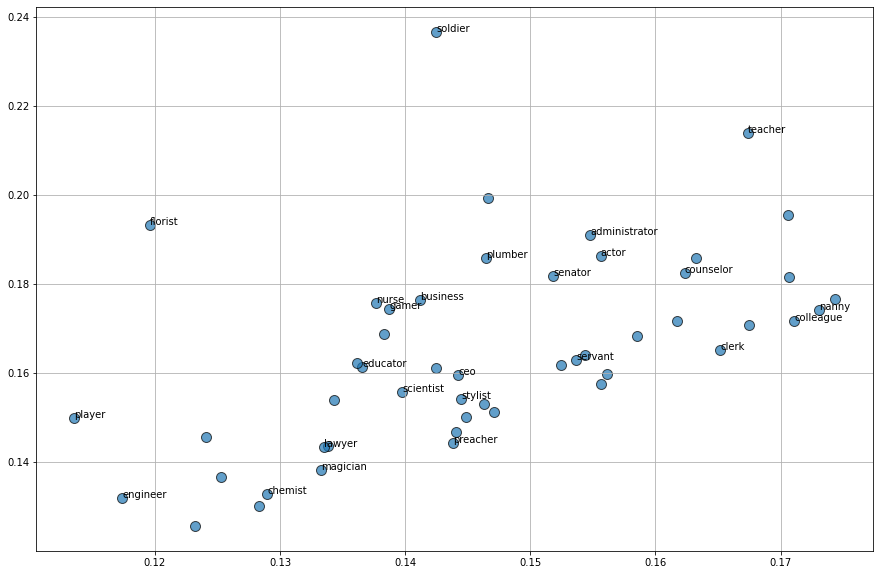

In [55]:
import matplotlib.pyplot as plt
from random import shuffle

fig, ax = plt.subplots(figsize=[15,10])

x_axis = []
y_axis = []

shuffled_list = professions
shuffle(shuffled_list)

for word in shuffled_list:
    words = model[word]
    words = sorted(words, reverse=True)[0:2]
    x_axis.append(words[1])
    y_axis.append(words[0])
        
grph = ax.scatter(x_axis, y_axis, s=100, alpha=0.7, edgecolors='black')

i = 0
for txt in shuffled_list:
    if(i%2==0):
        ax.annotate(str(txt),(x_axis[i],y_axis[i]))
    i+=1
    
ax.grid(True)



plt.show()

## REFERENCES USED: 
1. Bias_Word_Embeddings - https://github.com/ankit-pant/Bias_Word_Embeddings
2. gender-biases-in-word-embedding - https://github.com/csyhuang/gender-biases-in-word-embedding
3. Pre-trained model - https://www.kaggle.com/leadbest/googlenewsvectorsnegative300
4. Tolga Bolukbasi, et al., Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings, https://arxiv.org/pdf/1607.06520.pdf
    